# 🗂️ Moduly a submoduly

In [1]:
module MojModul

export moja_funkcia  # Určuje, ktoré symboly sú viditeľné mimo modulu

moja_premenna = 42  # Táto premenná nie je exportovaná

function moja_funkcia()
    println("Ahoj z modulu MojModul!")
end

end  # Koniec definície modulu


Main.MojModul

## ➡ Použitie modulu

In [2]:
using .MojModul  # Importujeme modul (bodka znamená, že sa nachádza v aktuálnom súbore)

moja_funkcia()  # Výstup: Ahoj z modulu MojModul!


Ahoj z modulu MojModul!


# 🧩 Submoduly 

In [3]:
module HlavnyModul

export hlavna_funkcia

function hlavna_funkcia()
    println("Toto je funkcia z hlavného modulu.")
end

module Podmodul
    export podmodul_funkcia

    function podmodul_funkcia()
        println("Toto je funkcia zo submodulu.")
    end
end  # Koniec podmodulu

end  # Koniec hlavného modulu


Main.HlavnyModul

## ➡ Použitie submodulu

In [4]:
using .HlavnyModul.Podmodul  # Importujeme submodul

podmodul_funkcia()  # Výstup: Toto je funkcia zo submodulu.


Toto je funkcia zo submodulu.


# 📋 Príklady modul Geometria

In [10]:
module GeometrickeTvary2D

export PI, obsah_kruhu, obvod_kruhu, obsah_obdlznika, obvod_obdlznika, obsah_trojuholnika, obvod_trojuholnika

# Konštanta pre π
const PI = 3.141592653589793

# Kruh
function obsah_kruhu(r)
    return PI * r^2
end

function obvod_kruhu(r)
    return 2 * PI * r
end

# Obdĺžnik
function obsah_obdlznika(a, b)
    return a * b
end

function obvod_obdlznika(a, b)
    return 2 * (a + b)
end

# Trojuholník (obsah cez Heronov vzorec)
function obsah_trojuholnika(a, b, c)
    s = (a + b + c) / 2
    return sqrt(s * (s - a) * (s - b) * (s - c))
end

function obvod_trojuholnika(a, b, c)
    return a + b + c
end

end  # Koniec modulu


Main.GeometrickeTvary2D

In [15]:
using .GeometrickeTvary2D

# println("Hodnota PI: ", PI)

# Testovanie funkcií
println("Obsah kruhu s polomerom 5: ", obsah_kruhu(5))
println("Obvod kruhu s polomerom 5: ", obvod_kruhu(5))

println("Obsah obdĺžnika so stranami 4 a 6: ", obsah_obdlznika(4, 6))
println("Obvod obdĺžnika so stranami 4 a 6: ", obvod_obdlznika(4, 6))

println("Obsah trojuholníka so stranami 3, 4, 5: ", obsah_trojuholnika(3, 4, 5))
println("Obvod trojuholníka so stranami 3, 4, 5: ", obvod_trojuholnika(3, 4, 5))


Obsah kruhu s polomerom 5: 78.53981633974483
Obvod kruhu s polomerom 5: 31.41592653589793
Obsah obdĺžnika so stranami 4 a 6: 24
Obvod obdĺžnika so stranami 4 a 6: 20
Obsah trojuholníka so stranami 3, 4, 5: 6.0
Obvod trojuholníka so stranami 3, 4, 5: 12


# 1️⃣ Revise.jl na automatickú aktualizáciu modulu
- Balík Revise.jl umožňuje automatické načítanie zmien v module bez nutnosti reštartovať kernel.
**Výhoda:** Zmeny v module sa načítajú automaticky a warning sa neobjaví.


In [12]:
import Pkg
Pkg.add("Revise")


    Updating registry at `C:\Users\miros\.julia\registries\General.toml`
   Resolving package versions...
   Installed Revise ─────────── v3.7.2
   Installed JuliaInterpreter ─ v0.9.41
    Updating `C:\Users\miros\.julia\environments\v1.11\Project.toml`
  [295af30f] + Revise v3.7.2
    Updating `C:\Users\miros\.julia\environments\v1.11\Manifest.toml`
  [da1fd8a2] + CodeTracking v1.3.6
  [aa1ae85d] + JuliaInterpreter v0.9.41
  [6f1432cf] + LoweredCodeUtils v3.1.0
  [295af30f] + Revise v3.7.2
Precompiling project...
   3731.9 ms  ✓ CodeTracking
   6084.2 ms  ✓ JuliaInterpreter
   4436.2 ms  ✓ LoweredCodeUtils
   6514.3 ms  ✓ Revise
   1135.1 ms  ✓ Revise → DistributedExt
  5 dependencies successfully precompiled in 50 seconds. 236 already precompiled.


In [13]:
using Revise
using .GeometrickeTvary2D  # Teraz už nevyvolá warning pri opakovanom načítaní


# 2️⃣ Použiť import namiesto using
- Pri import sa zabráni konfliktu s existujúcimi premennými a funkciami
**Výhoda:** Nevzniká názvový konflikt, ale musíte vždy používať GeometrickeTvary2D. pred volaním funkcie.


In [16]:
import .GeometrickeTvary2D

GeometrickeTvary2D.obsah_kruhu(5)  # Použitie s názvom modulu


78.53981633974483

# 3️⃣ Použiť reload("modul") zo Base
- Ak máte modul v samostatnom .jl súbore, môžete ho znovu načítať dynamicky bez konfliktu
**Výhoda:** Modul sa načíta nanovo bez potreby reštartu kernelu.

In [ ]:
Base.include(Main, "GeometrickeTvary2D.jl")


# 4️⃣ Reštartovať kernel
- Ak sa warning objaví, môžete jednoducho reštartovať kernel v Jupyter Notebooku:
Kliknite na Kernel → Restart Kernel and Run All Cells.
Tento prístup je vhodný, ak nechcete inštalovať Revise.jl.

# 💡 Najlepšie riešenie pre Jupyter Notebook
✅ Najlepšia voľba: Použiť Revise.jl alebo import namiesto using
✅ Alternatíva: Ak upravujete .jl súbor, použite Base.include().

Týmto spôsobom sa zbavíte warningov a budete môcť opakovane importovať modul bez konfliktov.

# 📋 Príklady modul Hmotnosti

In [18]:
module KonvertovanieHmotnosti

export gramy_na_kilogramy, kilogramy_na_gramy, gramy_na_libry, libry_na_gramy
export kilogramy_na_libry, libry_na_kilogramy, gramy_na_unce, unce_na_gramy

# Konštanty pre konverziu
const LIBRA_NA_GRAM = 453.59237
const UNCA_NA_GRAM = 28.34952

# Prevod medzi gramami a kilogramami
function gramy_na_kilogramy(gramy)
    return gramy / 1000
end

function kilogramy_na_gramy(kg)
    return kg * 1000
end

# Prevod medzi gramami a librami
function gramy_na_libry(gramy)
    return gramy / LIBRA_NA_GRAM
end

function libry_na_gramy(libry)
    return libry * LIBRA_NA_GRAM
end

# Prevod medzi kilogramami a librami
function kilogramy_na_libry(kg)
    return kg * 2.20462
end

function libry_na_kilogramy(libry)
    return libry / 2.20462
end

# Prevod medzi gramami a uncami
function gramy_na_unce(gramy)
    return gramy / UNCA_NA_GRAM
end

function unce_na_gramy(unce)
    return unce * UNCA_NA_GRAM
end

end  # Koniec modulu


Main.KonvertovanieHmotnosti

## ➡ Použitie modulu

In [19]:
using .KonvertovanieHmotnosti

println("500 gramov na kilogramy: ", gramy_na_kilogramy(500), " kg")
println("2 kilogramy na gramy: ", kilogramy_na_gramy(2), " g")

println("1000 gramov na libry: ", gramy_na_libry(1000), " lb")
println("2 libry na gramy: ", libry_na_gramy(2), " g")

println("5 kilogramov na libry: ", kilogramy_na_libry(5), " lb")
println("10 libier na kilogramy: ", libry_na_kilogramy(10), " kg")

println("250 gramov na unce: ", gramy_na_unce(250), " oz")
println("8 uncí na gramy: ", unce_na_gramy(8), " g")


500 gramov na kilogramy: 0.5 kg
2 kilogramy na gramy: 2000 g
1000 gramov na libry: 2.2046226218487757 lb
2 libry na gramy: 907.18474 g
5 kilogramov na libry: 11.0231 lb
10 libier na kilogramy: 4.535929094356398 kg
250 gramov na unce: 8.818491459467392 oz
8 uncí na gramy: 226.79616 g


# 📋 Príklady modul Zaujimavosti: Vedeli ste, že...

In [21]:
module ZaujimaveFakty

export nahodny_fakt

using Random

# Zoznam zaujímavých faktov
const FAKTY = [
    "Vo vesmíre nie je zvuk, pretože tam nie je vzduch na prenos zvuku.",
    "Srdce veľryby modrej váži približne toľko ako malé auto.",
    "Banány sú bobule, ale jahody nie sú.",
    "Existuje viac falošných plastových plameniakov než skutočných plameniakov na svete.",
    "Na povrchu Mesiaca zostalo viac ako 100 kusov vybavenia, ktoré tam zanechali astronauti NASA.",
    "Prvý email bol odoslaný v roku 1971.",
    "Vákuum vo vesmíre môže uvariť vodu pri izbovej teplote.",
    "Slnko je také veľké, že by sa doň zmestilo viac ako 1,3 milióna Zemí.",
    "Chobotnice majú tri srdcia a ich krv je modrá kvôli medi namiesto železa.",
    "Najstaršia známa pieseň, 'Hurrian Hymn No. 6', pochádza zo Sýrie a je stará viac ako 3 400 rokov."
]

# Funkcia na vygenerovanie náhodného faktu
function nahodny_fakt()
    return rand(FAKTY)
end

end  # Koniec modulu


Main.ZaujimaveFakty

## ➡ Použitie modulu

In [23]:
using .ZaujimaveFakty

println("Tu je zaujímavý fakt: ", nahodny_fakt())


Tu je zaujímavý fakt: Vo vesmíre nie je zvuk, pretože tam nie je vzduch na prenos zvuku.


# 📋 Príklady modul Generator planét

In [24]:
module GeneratorPlanet

export generuj_planetu

using Random

# Možné názvy planét
const NAZVY_PLANET = [
    "Zyphor-7", "Neptarion", "Xaltron Prime", "Vorlax-3", "Thermopylae XI",
    "Draconis Beta", "Kelvin-22", "Oblivion-5", "Zephyris", "Typhon V"
]

# Možné typy atmosféry
const ATMOSFERY = [
    "Dusíková s vysokým obsahom metánu", "Kyslíková ako na Zemi",
    "Toxická plná sírových plynov", "Tenká s vysokým obsahom oxidu uhličitého",
    "Vodíková s čpavkom", "Bez atmosféry"
]

# Možné gravitačné podmienky
const GRAVITACIA = [
    "Veľmi nízka (0.3g)", "Nízka (0.7g)", "Zemská (1.0g)",
    "Vysoká (1.5g)", "Extrémna (2.5g)"
]

# Možné teplotné podmienky
const TEPLOTA = [
    "Extrémne chladná (-200°C)", "Mrazivá (-50°C)", "Mierna (15°C)",
    "Horúca (50°C)", "Pekelná (400°C)"
]

# Funkcia na generovanie náhodnej planéty
function generuj_planetu()
    nazov = rand(NAZVY_PLANET)
    atmosfera = rand(ATMOSFERY)
    gravitacia = rand(GRAVITACIA)
    teplota = rand(TEPLOTA)

    return """
    🌌 Náhodne vygenerovaná planéta:
    🌍 Názov: $nazov
    ☁ Atmosféra: $atmosfera
    🏋 Gravitácia: $gravitacia
    🌡 Teplota: $teplota
    """
end

end  # Koniec modulu


Main.GeneratorPlanet

## ➡ Použitie modulu

In [28]:
using .GeneratorPlanet

println(generuj_planetu())


🌌 Náhodne vygenerovaná planéta:
🌍 Názov: Draconis Beta
☁ Atmosféra: Vodíková s čpavkom
🏋 Gravitácia: Veľmi nízka (0.3g)
🌡 Teplota: Horúca (50°C)



# 📋 Príklady modul Rimske Čísla XVI

In [29]:
module RimskeCisla

export arabsky_na_rimsky, rimsky_na_arabsky

# Mapovanie čísel na rímske číslice
const RIMSKE_CISLA = [
    1000 => "M", 900 => "CM", 500 => "D", 400 => "CD",
    100 => "C", 90 => "XC", 50 => "L", 40 => "XL",
    10 => "X", 9 => "IX", 5 => "V", 4 => "IV", 1 => "I"
]

# Konverzia arabských čísel na rímske
function arabsky_na_rimsky(n::Int)
    if n <= 0 || n >= 4000
        error("Podporované sú len čísla od 1 do 3999.")
    end

    rimsky = ""
    zostava = n

    for (hodnota, symbol) in RIMSKE_CISLA
        while zostava >= hodnota
            rimsky *= symbol
            zostava -= hodnota
        end
    end

    return rimsky
end

# Konverzia rímskych čísel na arabské
function rimsky_na_arabsky(rimsky::String)
    hodnoty = Dict('I' => 1, 'V' => 5, 'X' => 10, 'L' => 50, 
                   'C' => 100, 'D' => 500, 'M' => 1000)

    predchadzajuca = 0
    suma = 0

    for znak in reverse(rimsky)
        hodnota = hodnoty[znak]
        if hodnota < predchadzajuca
            suma -= hodnota
        else
            suma += hodnota
        end
        predchadzajuca = hodnota
    end

    return suma
end

end  # Koniec modulu


Main.RimskeCisla

## ➡ Použitie modulu

In [35]:
using .RimskeCisla

# Konverzia z arabských čísel na rímske
println("2024 v rímskych čísliciach: ", arabsky_na_rimsky(2024))
println("2025 v rímskych čísliciach: ", arabsky_na_rimsky(2025))
println("2026 v rímskych čísliciach: ", arabsky_na_rimsky(2026))

println("------------------------------------")
# Konverzia z rímskych čísel na arabské
println("MMXXIV v arabských čísliciach: ", rimsky_na_arabsky("MMXXIV"))
println("MMXXIV v arabských čísliciach: ", rimsky_na_arabsky("MMXXV"))
println("MMXXIV v arabských čísliciach: ", rimsky_na_arabsky("MMXXVI"))


2024 v rímskych čísliciach: MMXXIV
2025 v rímskych čísliciach: MMXXV
2026 v rímskych čísliciach: MMXXVI
------------------------------------
MMXXIV v arabských čísliciach: 2024
MMXXIV v arabských čísliciach: 2025
MMXXIV v arabských čísliciach: 2026


# 📋 Príklady modul Fraktály a L-systémy

In [36]:
module LSystem

export vykresli_lsystem

using Plots

# Funkcia na vygenerovanie L-systému podľa pravidiel
function generuj_lsystem(axiom::String, pravidla::Dict{Char, String}, iteracie::Int)
    retazec = axiom
    for _ in 1:iteracie
        novy_retazec = ""
        for znak in retazec
            novy_retazec *= get(pravidla, znak, string(znak))  # Aplikujeme pravidlá, inak necháme znak nezmenený
        end
        retazec = novy_retazec
    end
    return retazec
end

# Funkcia na vykreslenie L-systému
function vykresli_lsystem(axiom::String, pravidla::Dict{Char, String}, iteracie::Int, uhol::Float64, dlzka::Float64)
    prikazy = generuj_lsystem(axiom, pravidla, iteracie)
    
    x, y = 0.0, 0.0  # Počiatočná pozícia
    smer = 0.0       # Počiatočný smer (0° - vpravo)
    body_x, body_y = [x], [y]
    zasobnik = []

    for prikaz in prikazy
        if prikaz == 'F'  # Dopredu o 'dlzka'
            x += dlzka * cosd(smer)
            y += dlzka * sind(smer)
            push!(body_x, x)
            push!(body_y, y)
        elseif prikaz == '+'  # Otočenie doľava
            smer += uhol
        elseif prikaz == '-'  # Otočenie doprava
            smer -= uhol
        elseif prikaz == '['  # Uloženie stavu
            push!(zasobnik, (x, y, smer))
        elseif prikaz == ']'  # Obnova stavu
            x, y, smer = pop!(zasobnik)
            push!(body_x, x)
            push!(body_y, y)
        end
    end

    # Vykreslenie výsledku
    plot(body_x, body_y, linewidth=1, legend=false, axis=false)
end

end  # Koniec modulu


Main.LSystem

## ➡ Použitie modulu - Papraďový fraktál (Fern Fractal)

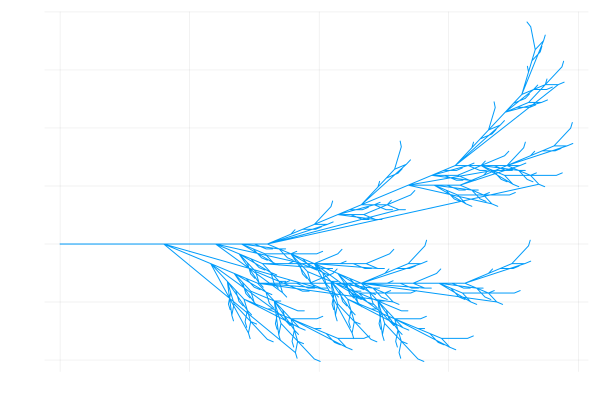

In [37]:
using .LSystem

# Definícia pravidiel L-systému pre fraktálový strom
axiom = "X"
pravidla = Dict(
    'X' => "F-[[X]+X]+F[+FX]-X",
    'F' => "FF"
)

iteracie = 5
uhol = 25.0
dlzka = 1.0

# Vykreslenie fraktálu
vykresli_lsystem(axiom, pravidla, iteracie, uhol, dlzka)


## ➡ Použitie modulu - Kochova snehová vločka (Koch Snowflake)

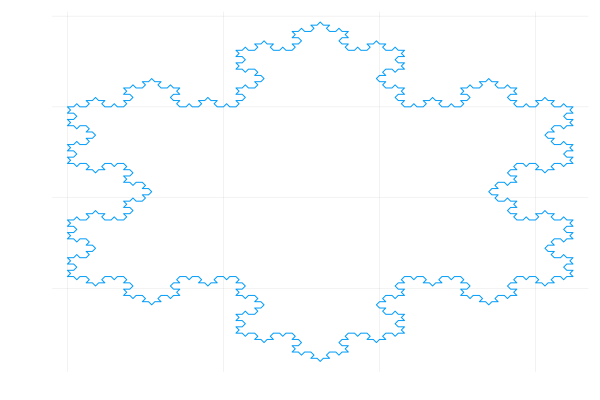

In [38]:
using .LSystem

# Definícia pravidiel pre Kochovu vločku
axiom = "F--F--F"
pravidla = Dict(
    'F' => "F+F--F+F"
)

iteracie = 4
uhol = 60.0
dlzka = 2.0

# Vykreslenie Kochovej snehovej vločky
vykresli_lsystem(axiom, pravidla, iteracie, uhol, dlzka)


## ➡ Použitie modulu - Hilbertova krivka

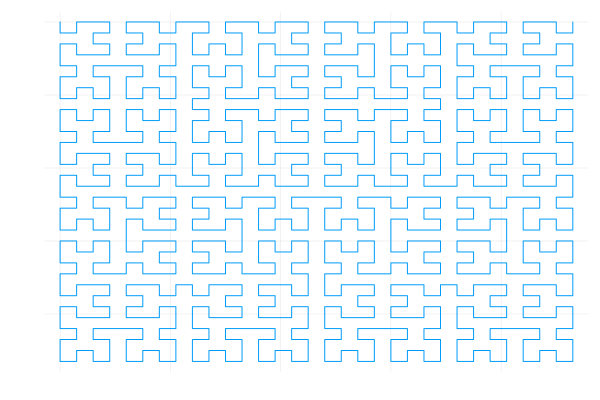

In [39]:
using .LSystem

# Definícia pravidiel pre Hilbertovu krivku
axiom = "A"
pravidla = Dict(
    'A' => "-BF+AFA+FB-",
    'B' => "+AF-BFB-FA+"
)

iteracie = 5
uhol = 90.0
dlzka = 3.0

# Vykreslenie Hilbertovej krivky
vykresli_lsystem(axiom, pravidla, iteracie, uhol, dlzka)


## ➡ Použitie modulu -  Dragon Curve (Dračia krivka)

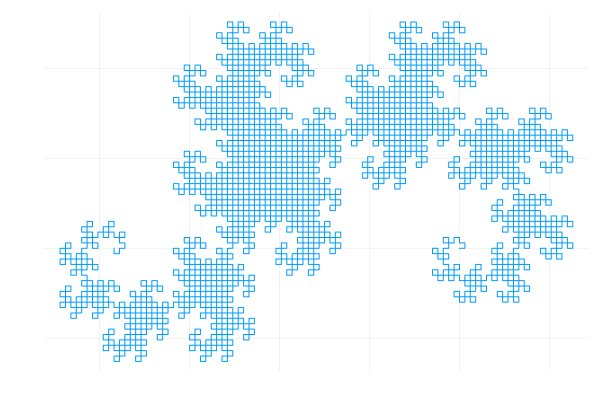

In [40]:
using .LSystem

# Definícia pravidiel pre Dragon Curve
axiom = "FX"
pravidla = Dict(
    'X' => "X+YF+",
    'Y' => "-FX-Y"
)

iteracie = 12
uhol = 90.0
dlzka = 3.0

# Vykreslenie Dragon Curve
vykresli_lsystem(axiom, pravidla, iteracie, uhol, dlzka)


## ➡ Použitie modulu - Peano Curve (Peanova krivka)

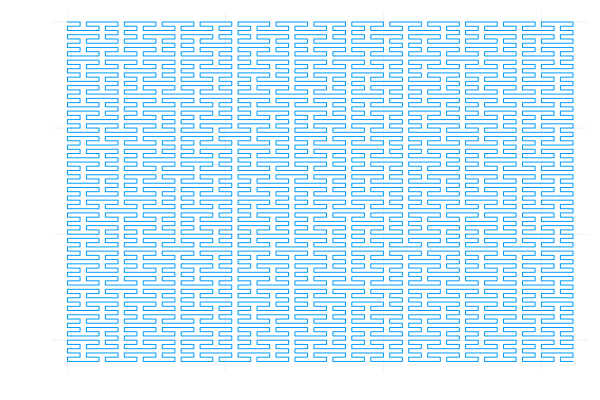

In [41]:
using .LSystem

# Definícia pravidiel pre Peano Curve
axiom = "L"
pravidla = Dict(
    'L' => "LFRFL-F-RFLFR+F+LFRFL",
    'R' => "RFLFR+F+LFRFL-F-RFLFR"
)

iteracie = 4
uhol = 90.0
dlzka = 2.0

# Vykreslenie Peanovej krivky
vykresli_lsystem(axiom, pravidla, iteracie, uhol, dlzka)
